### Описание проекта

Цель исследования — Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation), нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Исследование пройдёт по следующим этапам:

Изучить общую информацию. Подготовить данные. Провести исследовательский анализ данных. Составить портрет пользователя каждого региона. Проверить гипотезы.

### Описание столбцов

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

### Шаг 1. Открытие файла с данными и изучение общей информации

#### Открытие данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy import stats as st
warnings.filterwarnings('ignore') # отключаем предупреждения

In [2]:
# Создание Data Frame
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

#### Изучение общей информации

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Первые десять строк
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# Последние десять строк
df.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


#### Вывод

Привести к нижнему регистру название столбцов.

Преобразовать столбец столбец `year_of_release` тип данных на целочисленный.

Так же следует преобразовать `user_score`, там содержатся числовые значения об оценках.

В стобце `user_score` оценки распределены по 10-ти бальной шкале

В столбце `critic_score` оценки распределены по 100-бальной шкале

В данных есть пропущенные значения.

### Шаг 2. Подготовка данных

#### Изменение название столбцов

In [6]:
# Приведение к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
#df.info()

#### Обработка пропусков

Поиск соотношения пропущенных значений в столбце

In [8]:
pd.DataFrame(df.isna().mean()).style.background_gradient('Reds').format({0:'{:.2%}'})

,0
name,0.01%
platform,0.00%
year_of_release,1.61%
genre,0.01%
na_sales,0.00%
eu_sales,0.00%
jp_sales,0.00%
other_sales,0.00%
critic_score,51.32%
user_score,40.09%


В столбцах `name`, `year_of_release` и `genre` маленькое значение пропусков, их можно удалить.

In [9]:
# Удаление пропусков в name и year_of_release
df = df.dropna(subset = ['name', 'year_of_release', 'genre']).reset_index(drop=True)

Очень много пропущенных занечений в столбцах `critic_score`, `user_score` и `rating`. Заполнение столбцов не предстовляется возможным, так как влиять на данный параметр мы не можеим.

В столбцах `user_score`, `critic_score` появились пропущенные значения, так как игры непопулярные и не получили оценки и присвоения какого - либо рейтинга. Так же возможно игры появились до появления асоциации ESRB оценивающие игры. 

Заменим пропущенные значения в колонке `rating` на значение `undefined`

In [10]:
df['rating'] = df['rating'].fillna('undefined')

В столбце `user_score` встречается аббревиатура "tbd", что означает: "подлежит уточнению". Скорей всего из-за этого тип данных не числовой. 

Заменим аббревиатура "tbd" на NaN

In [11]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

#### Изменение типов данных

In [12]:
# Изменение тип данных в year_of_release
df['year_of_release'] = df['year_of_release'].astype(int)

In [13]:
# Изменение тип данных в user_score
df['user_score'] = df['user_score'].astype(float)

In [14]:
#df.info()

Столбец `year_of_release` содержит одно целочисленное число, преобразуем тим в `int`.

Столбец `user_score` содержит цисло с десятичной дробью, преобразуем в `float`.

#### Суммарные продажи во всех регионах

In [15]:
# Добавление столбца total_sales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

#### Удаления явных дубликатов

In [16]:
#Количество строк
df.shape

(16444, 12)

In [17]:
# Удаления явных дубликатов
df = df.drop_duplicates().reset_index(drop=True)

In [18]:
#Количество строк
df.shape

(16444, 12)

Явных дупликатов не оказалось

#### Вывод

Первым делом поменяли название в столбцах, привели все к однообразному виду.

Проверили данные на пустые значения. Нашлось достаточно много в нескольких столбцах. В столбцах, где минимальное значение пропусков, строки удалили.

Изменили тип данных для удобного чтения.

Добавили столбец Сумму продаж во всех регионах.

### Шаг 3. Исследовательский анализ данных

#### Сколько игр выпускалось в разные годы

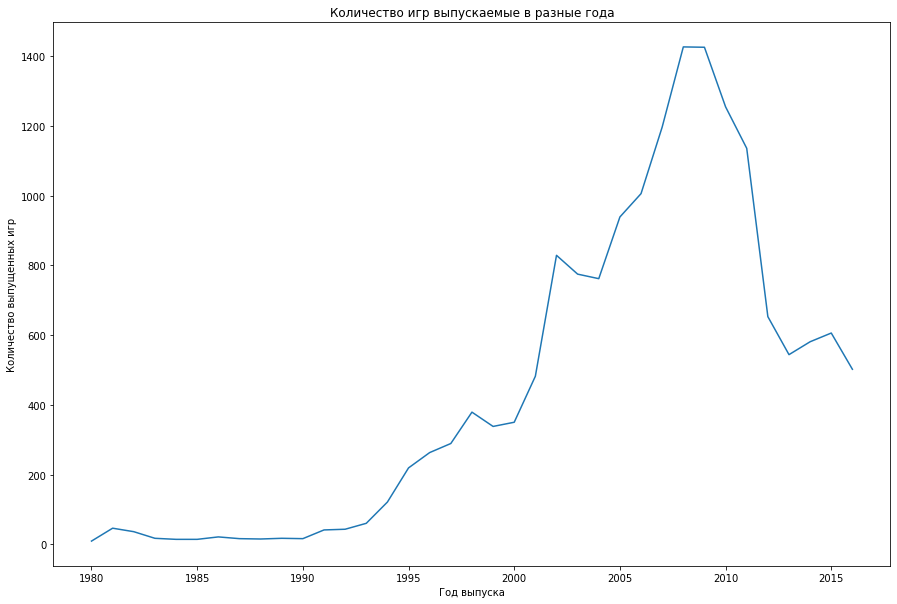

In [19]:
#df.groupby('year_of_release').agg({'name':'count'}).style.bar()

games_on_period = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(15,10))
sns.lineplot(data=games_on_period)
plt.title("Количество игр выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend().set_visible(False)
plt.show()

Количество игр начало расти с большой скоростью в середине 90х годов.

Года с самым большим выпуском игр 2008 и 2009, было выпущенно 1427 и 1426 соотвественно.

После 2012 года наблюдается спад выпуска игр.

Не все данные выжны, так как есть года с маленьким количеством выпуска игр.

#### Продажи по платформам. Платформы с наибольшими суммарными продажами.

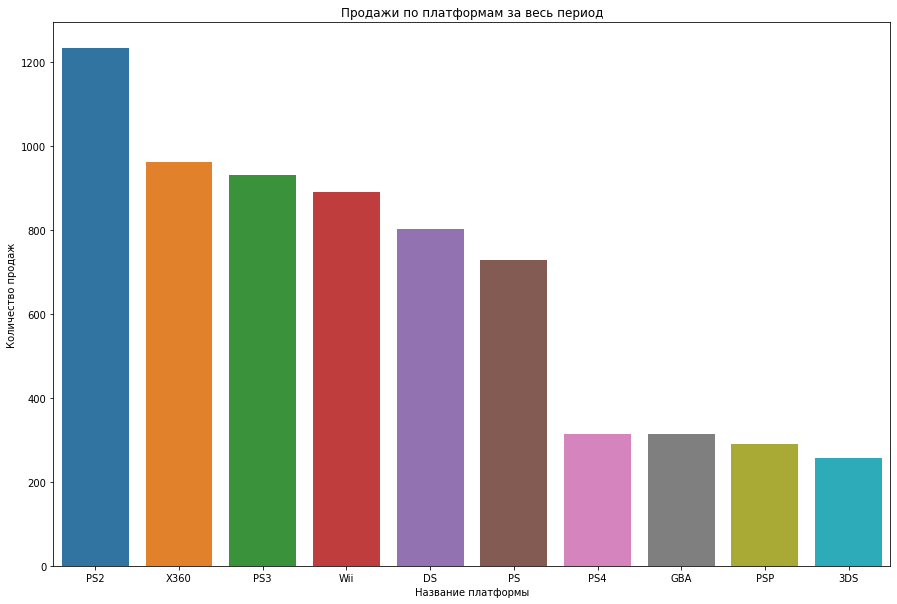

In [20]:
# Сумма проданных копий игр в миллонах
# 10 лучших платформ по количеству проданных копий за все время
#df.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head(10).style.bar().format({'total_sales':'{:.2f}'})

platform_on_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10)
plt.figure(figsize=(15,10))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

По графику видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS

In [21]:
# Сумма проданных копий игр в миллонах для платформы PS2
df.loc[df['platform'] == 'PS2'].groupby('year_of_release').agg({'total_sales':'sum'}).style.bar().format({'total_sales':'{:.2f}'})

,total_sales
year_of_release,
2000,39.17
2001,166.43
2002,205.38
2003,184.31
2004,211.81
2005,160.66
2006,103.42
2007,75.99
2008,53.90


In [22]:
# Сумма проданных копий игр в миллонах для платформы X360
df.loc[df['platform'] == 'X360'].groupby('year_of_release').agg({'total_sales':'sum'}).style.bar().format({'total_sales':'{:.2f}'})

,total_sales
year_of_release,
2005,8.25
2006,51.62
2007,95.41
2008,135.26
2009,120.29
2010,170.03
2011,143.84
2012,99.74
2013,88.58


In [23]:
# Сумма проданных копий игр в миллонах для платформы PS3
df.loc[df['platform'] == 'PS3'].groupby('year_of_release').agg({'total_sales':'sum'}).style.bar().format({'total_sales':'{:.2f}'})

,total_sales
year_of_release,
2006,20.96
2007,73.19
2008,118.52
2009,130.93
2010,142.17
2011,156.78
2012,107.36
2013,113.25
2014,47.76


In [24]:
# Сумма проданных копий игр в миллонах для платформы Wii
df.loc[df['platform'] == 'Wii'].groupby('year_of_release').agg({'total_sales':'sum'}).style.bar().format({'total_sales':'{:.2f}'})

,total_sales
year_of_release,
2006,137.15
2007,152.77
2008,171.32
2009,206.97
2010,127.95
2011,59.65
2012,21.71
2013,8.59
2014,3.75


In [25]:
# Сумма проданных копий игр в миллонах для платформы DS
df.loc[df['platform'] == 'DS'].groupby('year_of_release').agg({'total_sales':'sum'}).style.bar().format({'total_sales':'{:.2f}'})

,total_sales
year_of_release,
1985,0.02
2004,17.27
2005,130.14
2006,119.81
2007,146.94
2008,145.31
2009,119.54
2010,85.02
2011,26.18


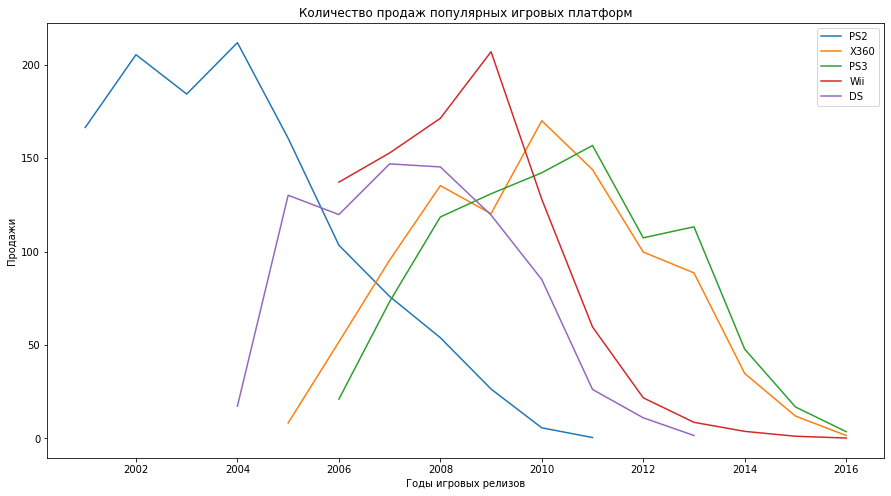

In [26]:
#Функцию, которая возвращет нужную сводную таблицу и выводит данные с 2000 года
def year_total_sale(name, data):
    total = df[(data['platform'] == name) & (data['year_of_release'] > 2000)].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

top_5 = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5 = top_5.reset_index().rename_axis(None, axis=1)

plt.figure(figsize=(15,8))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_5['platform']):
    sns.lineplot(data=year_total_sale(i,df)['total_sales'], label=i)
    plt.legend()

Платформа живёт около 10 лет, так как продажи игр очень сильно падают на 11 год после выхода платформы.

Активность продаж игр по платформе набирает пик к 4-6 лет жизни, потом начинает падать.

In [27]:
#Будем считать самый ранний год выпуска игр для платформы годом выпуска этой платформы. Найдем разницу между годами выпуска платформ и поделем на количество платформ.

#df.pivot_table(index='platform', values='year_of_release', aggfunc='min').sort_values(by='year_of_release', ascending=True)
new_platform = df.pivot_table(index='platform', values='year_of_release', aggfunc='min').sort_values(by='year_of_release', ascending=True)

sum_diff = 0
amount_patform = len(df['platform'].unique())
for i in range(len(new_platform['year_of_release']) - 1):
  sum_diff += new_platform['year_of_release'][i+1] - new_platform['year_of_release'][i]
sum_diff/amount_patform

1.064516129032258

Новые платформы, появлялись в среднем почти раз в один год.

#### Данные за соответствующий актуальный период

 Платформа живёт около 10 лет, а активность продаж игр по платформе набирает пик к 4-6 лет жизни платформы.

Первый год жизни платформ можно не учитывать, так как игры выпускают достаточно мало.

Последнее актуальные две платформы из популярной серии PS4 и XOne выпущены в 2013 году.

**Для прогноза на 2017 год необходимо взять данные начиная с 2014 года, которые будут соотвествовать последним 3 годам актуальных платформ.**
 


#### Не учитывайте в работе данные за предыдущие годы

In [28]:
good_df = df[df['year_of_release'] >= 2014]

#### Потенциально прибыльные платформ.

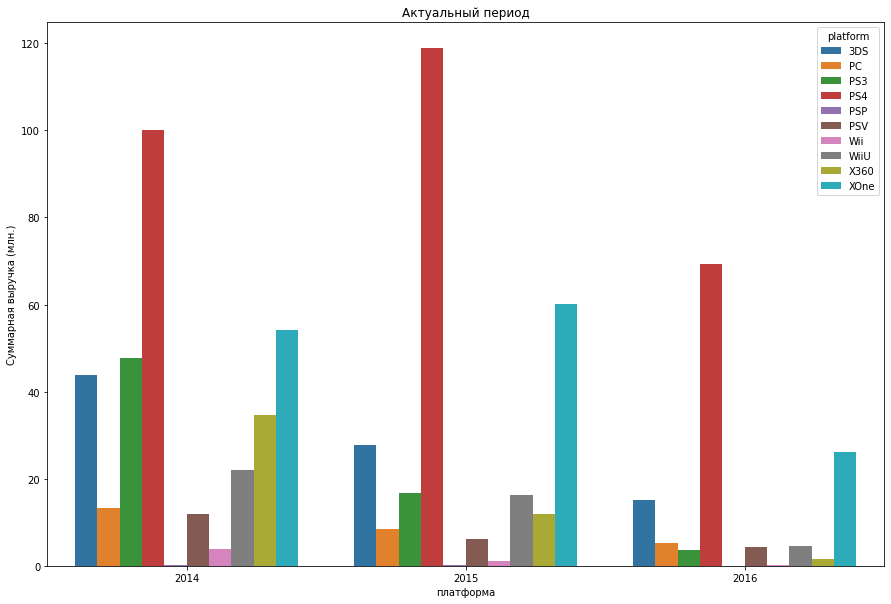

In [29]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data = good_df.groupby(['year_of_release', 'platform'], as_index=False).agg({'total_sales':'sum'}), ax=ax, x = "year_of_release", y = "total_sales", hue = "platform")
plt.xlabel('платформа')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.show()

С 2014 года продажа игр на старые платформы занчительно уменьшается. Актуальные платформы впереди по продажам. Так же идет общий спад продаж игр по всем платформам.

Последнее актуальные платформы из популярной серии PS4, 3DS и XOne выпущены в 2013 году, похожи на потенциально прибыльные.

#### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

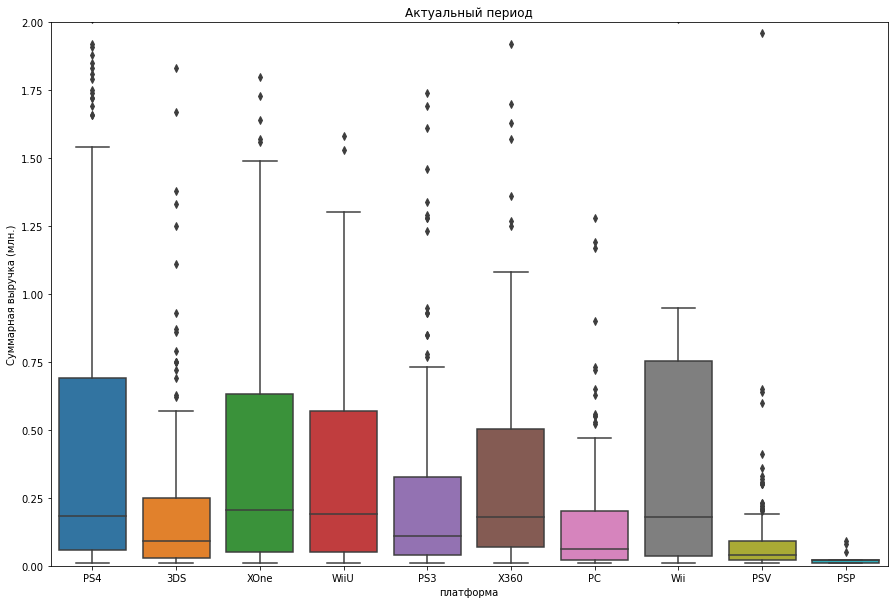

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(data=good_df, x='platform', y='total_sales')
plt.xlabel('платформа')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 2])
plt.show()

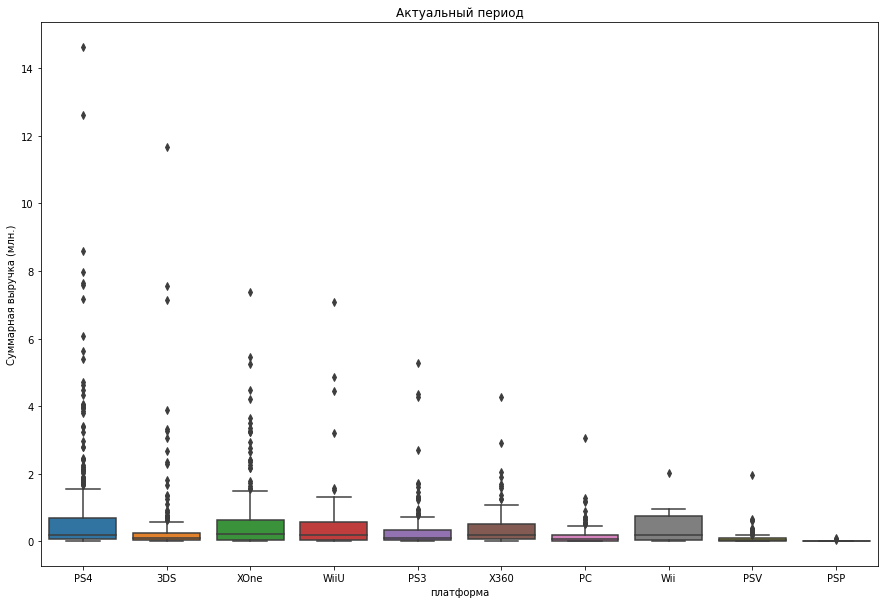

In [31]:
plt.figure(figsize=(15,10))
sns.boxplot(data=good_df, x='platform', y='total_sales')
plt.xlabel('платформа')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.show()

Исходя из графиков видно, что медиана протекает у всех по разному.
Больше всех продаж у PS4, затем XOne.


У платформ PS4, 3DS и XOne есть не мало игр с большим количеством проданных копий, а чем свидетельствуют выбросы на графике.

#### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.


Возьмем платформу PS4, как самую популярную платформу.

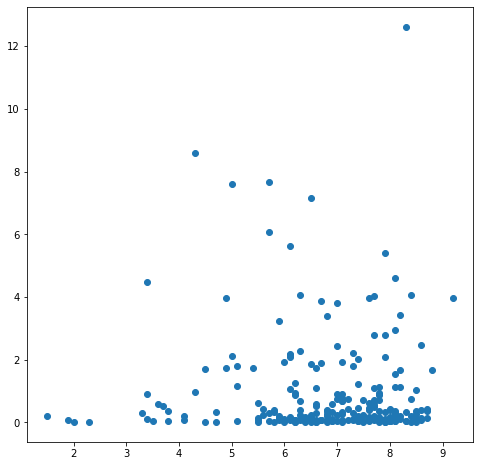

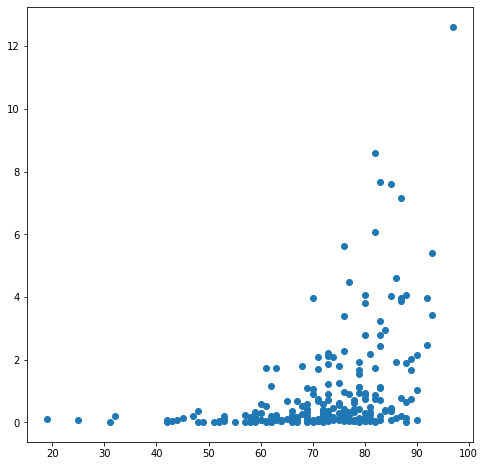

In [32]:
# Данные с одной платформаой PS4
PS4 = good_df[good_df['platform']=='PS4']
# Исключениене не заполненых значений в столбцах user_score и critic_score
PS4 = PS4[PS4['user_score'].isnull() == False] 
PS4 = PS4[PS4['critic_score'].isnull() == False]

x = PS4['user_score']   
y = PS4['total_sales']   
fig, ax = plt.subplots()
ax.scatter(x, y) 
fig.set_figwidth(8)     
fig.set_figheight(8)    
plt.show()

x = PS4['critic_score']    
y = PS4['total_sales']   
fig, ax = plt.subplots()
ax.scatter(x, y) 
fig.set_figwidth(8)     
fig.set_figheight(8)    
plt.show()

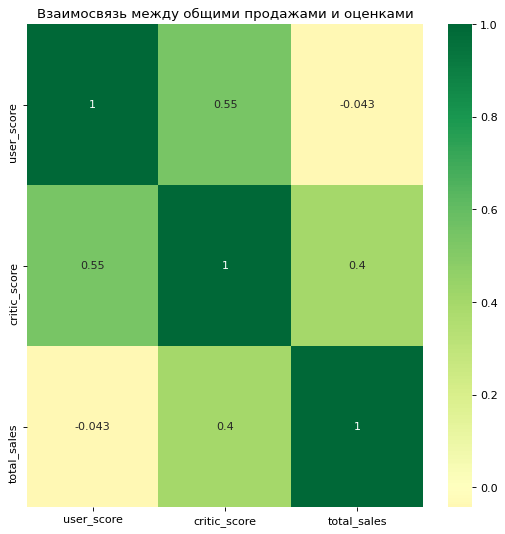

In [33]:
PS4 = PS4[['platform', 'user_score', 'critic_score', 'total_sales']]
plt.figure(figsize=(8,8), dpi= 80)
sns.heatmap(PS4.corr(), xticklabels=PS4.corr().columns, yticklabels=PS4.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Взаимосвязь между общими продажами и оценками')
plt.show()

Оценки пользователей никак не влияют на продажи игр. 

Оценки критиков имеют небольшой влияние.


#### Выводы с продажами игр на других платформах

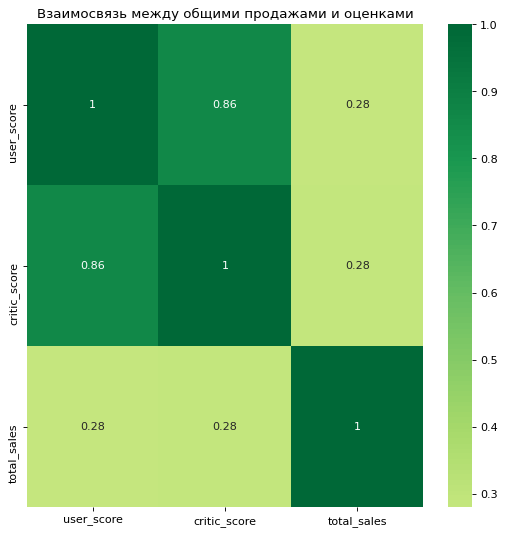

In [34]:
# Данные с одной платформаой PS4
DS3 = good_df[good_df['platform']=='3DS']
# Исключениене не заполненых значений в столбцах user_score и critic_score
DS3 = DS3[DS3['user_score'].isnull() == False] 
DS3 = DS3[DS3['critic_score'].isnull() == False]


DS3 = DS3[['platform', 'user_score', 'critic_score', 'total_sales']]
plt.figure(figsize=(8,8), dpi= 80)
sns.heatmap(DS3.corr(), xticklabels=DS3.corr().columns, yticklabels=DS3.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Взаимосвязь между общими продажами и оценками')
plt.show()

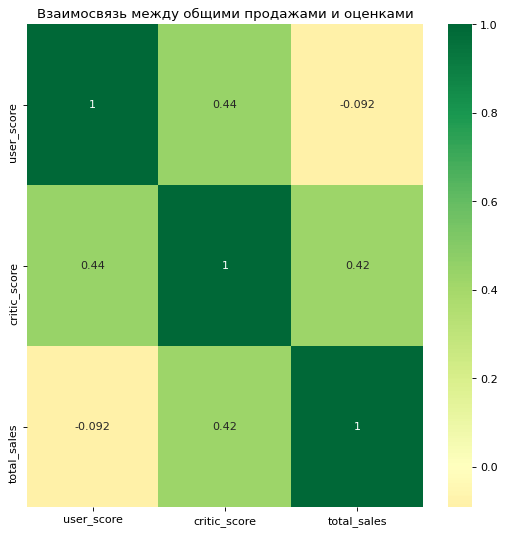

In [35]:
# Данные с одной платформаой PS4
XOne = good_df[good_df['platform']=='XOne']
# Исключениене не заполненых значений в столбцах user_score и critic_score
XOne = XOne[XOne['user_score'].isnull() == False] 
XOne = XOne[XOne['critic_score'].isnull() == False]


XOne = XOne[['platform', 'user_score', 'critic_score', 'total_sales']]
plt.figure(figsize=(8,8), dpi= 80)
sns.heatmap(XOne.corr(), xticklabels=XOne.corr().columns, yticklabels=XOne.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Взаимосвязь между общими продажами и оценками')
plt.show()

Ситуация аналогичная, оценки пользователей особой роли не играют, но вот оценки критиков всё же имеют нембольшое значение.

Покупатели прислушиваются больше к критикам чем к оценкам других пользователей

#### Общее распределение игр по жанрам

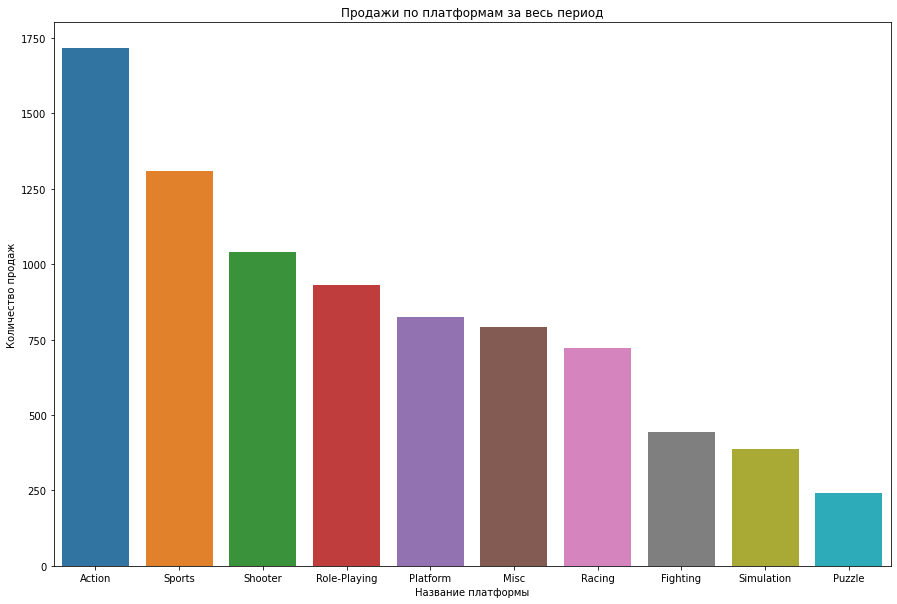

In [36]:
#good_df.groupby('genre').agg({'total_sales':'sum'}).sort_values('total_sales', ascending=False).style.bar().format({'total_sales':'{:.2f}'})

genre = df.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10)
plt.figure(figsize=(15,10))
sns.barplot(x=genre.index,y=genre['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

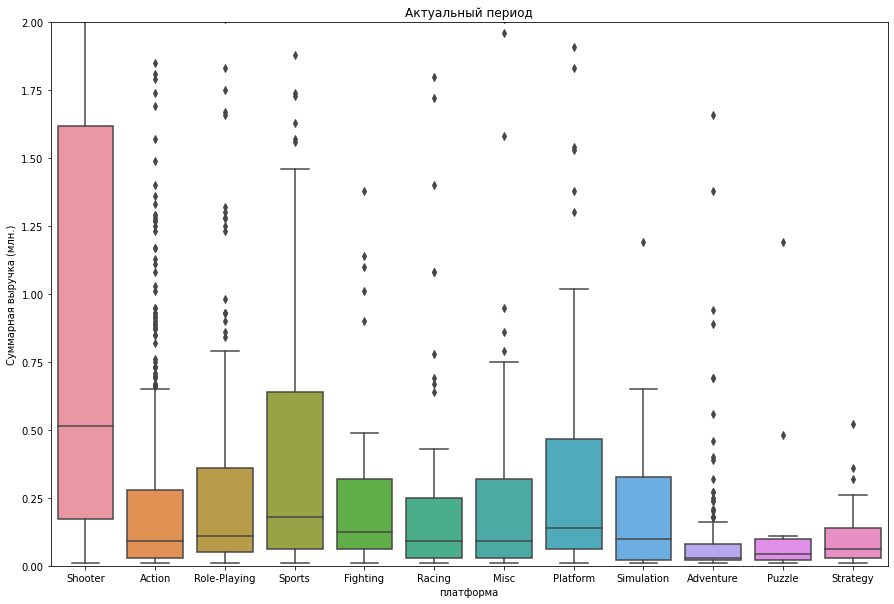

In [37]:
plt.figure(figsize=(15,10))
sns.boxplot(data=good_df, x='genre', y='total_sales')
plt.xlabel('платформа')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 2])
plt.show()

Action самый продаваемый, но при этом жанр Shooter лидирует по средним продажам в сравнении с остальными жанрами, что нельзя сказать про Action. Стратегии и пазлы держутся на последнем месте.

#### Вывод

Количество игр начало расти с большой скоростью в середине 90х годов.
Года с самым большим выпуском игр 2008 и 2009, было выпущенно 1427 и 1426 соотвественно.
После 2012 года наблюдается спад выпуска игр.

Платформа живёт около 10 лет, а активность продаж игр по платформе набирает пик к 4-6 лет жизни платформы.
Последнее актуальные две платформы из популярной серии PS4 и XOne выпущены в 2013 году.

С 2014 года продажа игр на старые платформы занчительно уменьшается. Актуальные платформы впереди по продажам. Так же идет общий спад продаж игр по всем платформам. Больше всех продаж у PS4, затем XOne.

Оценки пользователей особой роли не играют, но вот оценки критиков всё же имеют нембольшое значение.
Покупатели прислушиваются больше к критикам чем к оценкам других пользователей

Action самый продаваемый, но при этом жанр Shooter лидирует по средним продажам в сравнении с остальными жанрами. Стратегии и пазлы держутся на последнем месте.


### Шаг 4. Портрет пользователя каждого региона

In [38]:
# Функция поределение Топ-5 для заданных параметров по актуальному периоду
def current_region(group, region):
    good_df['ratio'] = good_df[region] / good_df[region].sum()
    return good_df.groupby(group).agg({'ratio':'sum'}).sort_values('ratio', ascending=False).head(5)


data1 = current_region('platform', 'na_sales')
data2 = current_region('platform', 'eu_sales')
data3 = current_region('platform', 'jp_sales')

#### Самые популярные платформы (топ-5).

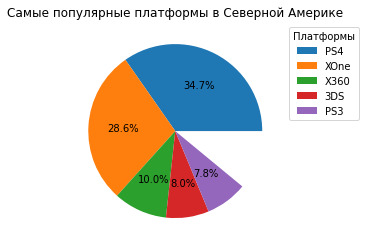

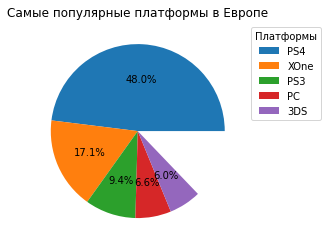

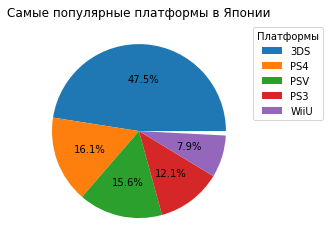

In [39]:
data1['ratio'].plot(kind="pie", autopct='%1.1f%%', legend=True, title='Самые популярные платформы в Северной Америке', ylabel='', labeldistance=None).legend( title='Платформы', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()
data2['ratio'].plot(kind="pie", autopct='%1.1f%%', legend=True, title='Самые популярные платформы в Европе', ylabel='', labeldistance=None).legend( title='Платформы', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()              
data3['ratio'].plot(kind="pie", autopct='%1.1f%%', legend=True, title='Самые популярные платформы в Японии', ylabel='', labeldistance=None).legend( title='Платформы', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Самые популярные платформы в Сервеной Америке PS4 и XOne

Самые популярные платформы в Европе PS4 и XOne

Самые популярная платформа с большым отрывом в Японии это 3DS.
Все самые популярные платформы в Японии от японских производителей.

Самые популярная платформа с большым отрывом в Японии это 3DS. 

Все самые популярные платформы в Японии от японских производителей.

#### Самые популярные жанры (топ-5)

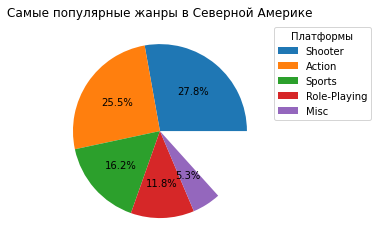

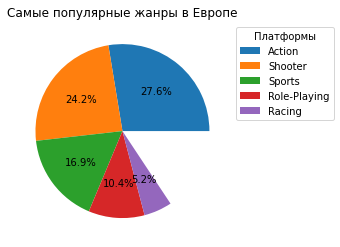

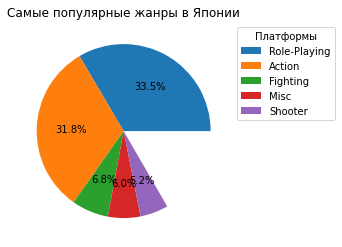

In [40]:
data1 = current_region('genre', 'na_sales')
data2 = current_region('genre', 'eu_sales')
data3 = current_region('genre', 'jp_sales')

data1['ratio'].plot(kind="pie", autopct='%1.1f%%', legend=True, title='Самые популярные жанры в Северной Америке', ylabel='', labeldistance=None).legend( title='Платформы', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()
data2['ratio'].plot(kind="pie", autopct='%1.1f%%', legend=True, title='Самые популярные жанры в Европе', ylabel='', labeldistance=None).legend( title='Платформы', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()              
data3['ratio'].plot(kind="pie", autopct='%1.1f%%', legend=True, title='Самые популярные жанры в Японии', ylabel='', labeldistance=None).legend( title='Платформы', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Популярные жанры в Северной Америке Shooter и Action

Популярные жанры в Европе Action и Shooter

В Японии самые популярные жанры Role-Playing и Action.

В Японии очень много игры в стлие JRPG (Japanese Role-Playing Game), в используемых данных это жанр Role-Playing.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

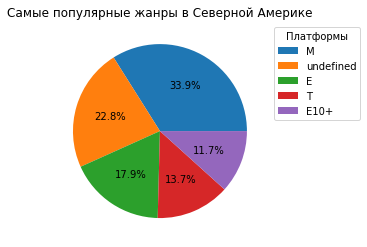

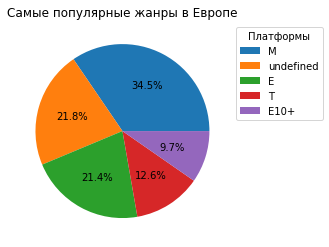

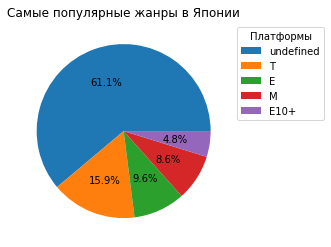

In [41]:
data1 = current_region('rating', 'na_sales')
data2 = current_region('rating', 'eu_sales')
data3 = current_region('rating', 'jp_sales')

data1['ratio'].plot(kind="pie", autopct='%1.1f%%', legend=True, title='Самые популярные жанры в Северной Америке', ylabel='', labeldistance=None).legend( title='Платформы', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()
data2['ratio'].plot(kind="pie", autopct='%1.1f%%', legend=True, title='Самые популярные жанры в Европе', ylabel='', labeldistance=None).legend( title='Платформы', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()              
data3['ratio'].plot(kind="pie", autopct='%1.1f%%', legend=True, title='Самые популярные жанры в Японии', ylabel='', labeldistance=None).legend( title='Платформы', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

В Северной Америке и Европе предпочитают делать игры для более зврослого населения от 17 лет, а так же игр Без рейтинга и для всех возрастов.

В Японии выделяются игры Без рейтинга.

#### Вывод

После проведения исследовательского анализа можем составить портрет каждого региона:

Северная Америка:

Самые популярные игровые платформы в Северной Америке: PS4, XOne, X360, 3DS, PS3
Самые популярные жанры в Северной Америке: Shooter, Action, Sports, Role-Playing, Misc
Самый предпочитаемый рейтинг в Северной Америке: игры от 17 лет, Без рейтинга, игры для всех, игры от 13 лет, от 10 лет.

Европа:

Самые популярные игровые платформы Европе: PS4, XOne, PS3, PC, 3DS
Самые популярные жанры в Европе: Action, Shooter, Sports, Role-Playing, Racing
Самый предпочитаемый рейтинг в Европе: игры от 17 лет, Без рейтинга, игры для всех, игры от 13 лет, от 10 лет.

Япония:

Самые популярные игровые платформы в Японии - японские платформы: 3DS, PS4, PSV, PS3, WiiU
Самые популярные жанры в Японии: Role-Playing, Action, Fighting, Misc, Shooter
Самый предпочитаемый рейтинг в Японии: Без рейтинга, игры от 13 лет, игры для всех, игры от 17 лет, игры от 10 лет.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Для гипотезы о равенстве средних двух лучше всех подходит метод sttest_ind

In [42]:
XOne = good_df[good_df['platform'] == 'XOne']
XOne = XOne[XOne['user_score'].isnull() == False] 
PC = good_df[good_df['platform'] == 'PC']
PC = PC[PC['user_score'].isnull() == False]

alpha = 0.05 

results = st.ttest_ind(XOne['user_score'], PC['user_score'], equal_var=False)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
    
    
print(XOne['user_score'].mean())
print(PC['user_score'].mean())

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу
6.594545454545456
6.298360655737705


У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

#### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports различаются

Для гипотезы о равенстве средних двух лучше всех подходит метод sttest_ind

In [43]:
Action = good_df[good_df['genre'] == 'Action']
Action = Action[Action['user_score'].isnull() == False] 
Sports = good_df[good_df['genre'] == 'Sports']
Sports = Sports[Sports['user_score'].isnull() == False]

alpha = 0.05 

results = st.ttest_ind(Action['user_score'], Sports['user_score'], equal_var=False)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
    
print(Action['user_score'].mean())
print(Sports['user_score'].mean())

1.1825550382644557e-14
Отвергаем нулевую гипотезу
6.760606060606061
5.2251968503937


У нас есть оснований утверждать, что средние пользовательские рейтинги жанров Action и Sports значимо различаются.

#### Вывод

После проведения статистического анализа:

Средние пользовательские рейтинги платформ Xbox one и PC одинаковые

Средние пользовательские рейтинги жанров Action и Sports разные

### Общий вывод

Расмотрели из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Перед анализом данных, мы подготовили наши данные, привели к правильным данным столбцы, привели к нижнему регистру таблицы и сами названия колонок и привели к правильным типам данных необходимые столбцы.

Проведя анализ, мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года.

Объём рынка по продажам игр упал в 2012 году и стабильно держится.
Больше всего люди покупают игры на консоли семейства Xbox или Playstation.
В среднем платформа живёт около 10 лет.
Пик продаж происходит на 4-5 год поколения.

Оценки пользователей особой роли не играют, но вот оценки критиков всё же имеют нембольшое значение. Покупатели прислушиваются больше к критикам чем к оценкам других пользователей.

Большинство людей предпочитает экшн или шутер.

Так же мы составили предпочтения по регионам:

Северная Америка:

Самые популярные игровые платформы в Северной Америке: PS4, XOne, X360, 3DS, PS3
Самые популярные жанры в Северной Америке: Shooter, Action, Sports, Role-Playing, Misc
Самый предпочитаемый рейтинг в Северной Америке: игры от 17 лет, Без рейтинга, игры для всех, игры от 13 лет, от 10 лет.

Европа:

Самые популярные игровые платформы Европе: PS4, XOne, PS3, PC, 3DS
Самые популярные жанры в Европе: Action, Shooter, Sports, Role-Playing, Racing
Самый предпочитаемый рейтинг в Европе: игры от 17 лет, Без рейтинга, игры для всех, игры от 13 лет, от 10 лет.

Япония:

Самые популярные игровые платформы в Японии - японские платформы: 3DS, PS4, PSV, PS3, WiiU
Самые популярные жанры в Японии: Role-Playing, Action, Fighting, Misc, Shooter
Самый предпочитаемый рейтинг в Японии: Без рейтинга, игры от 13 лет, игры для всех, игры от 17 лет, игры от 10 лет.

Рекомендации

Лучше всего продавать игры для приставки PS4.
Среди жанров лучше выбрать на Action и Shooter.
Игры с рейтингом M (17 и старше).
Разместить в информации об игре рейтинг критиков. 

